<a href="https://colab.research.google.com/github/OlegKret/---/blob/master/lab6_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-d609ffa78ec7>:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(min(node_sizes), max(node_sizes)), cmap=plt.cm.viridis), label='Node Degree', shrink=0.8)  # Smaller colorbar


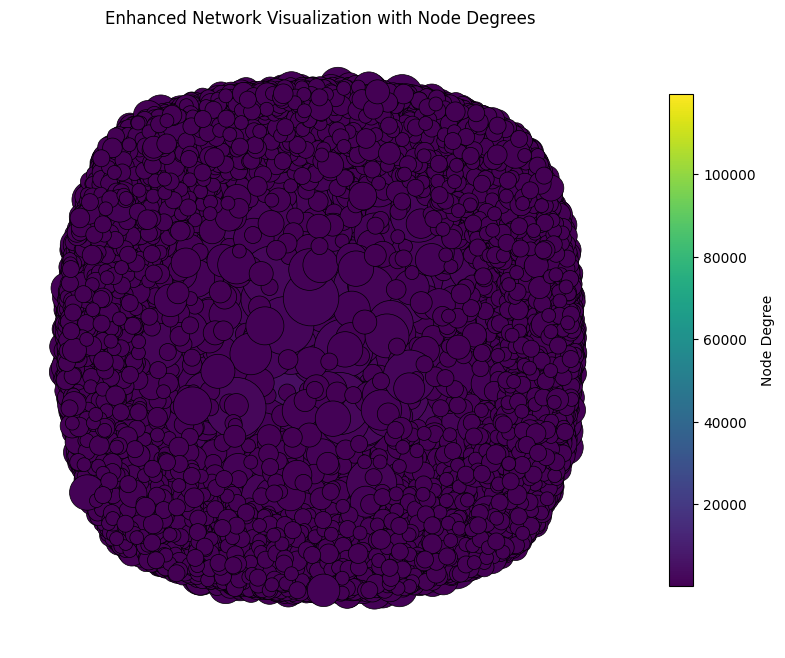

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Load your dataset
G = nx.read_gml("/content/sample_data/internet_routers-22july06.gml")

# Performance Optimization:
if len(G) > 1000:  # Threshold for simplifying large graphs
    # Option 1: Reduce node/edge count (if appropriate)
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc)

    # Option 2: Use a more efficient drawing backend (if Matplotlib is slow)
    # Example with Graphviz (requires installation):
    # import pygraphviz as pgv
    # A = nx.nx_agraph.to_agraph(G)
    # A.draw("output.png", prog="neato")  # Choose a layout algorithm

# Enhanced Visualization (with optimizations):
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Adjust parameters for better layout

# Node Appearance:
node_degrees = dict(G.degree())
node_sizes = [v * 50 + 50 for v in node_degrees.values()]  # Scaling for visual clarity
node_colors = [plt.cm.viridis(v / max(node_sizes)) for v in node_sizes]  # Smoother color transition
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, linewidths=0.5, edgecolors='black')  # Added linewidths and edgecolors

# Edge Appearance:
nx.draw_networkx_edges(G, pos, alpha=0.2)  # Lower alpha for less cluttered view

# Labels (Optimize if too many labels cause clutter):
# You can try a subset of nodes based on degree or importance
# large_nodes = [node for node, degree in G.degree() if degree > 10]
# nx.draw_networkx_labels(G, pos, font_size=8, labels={n: n for n in large_nodes})

plt.title("Enhanced Network Visualization with Node Degrees")
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(min(node_sizes), max(node_sizes)), cmap=plt.cm.viridis), label='Node Degree', shrink=0.8)  # Smaller colorbar
plt.axis('off')
plt.show()